In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from grid import shake
from mpl_toolkits.basemap import Basemap

In [3]:
shakefile = '/Users/mhearne/data/shakemaps/northridge.xml'

In [4]:
def map2DGrid(ax,grid,tstr,isLeft=False):
    """
    grid is a Grid2D object 
    """
    xmin,xmax,ymin,ymax = grid.getBounds()
    pdata = grid.getData()
    nr,nc = pdata.shape
    lonrange = np.linspace(xmin,xmax,num=nc)
    latrange = np.linspace(ymin,ymax,num=nr)
    lon,lat = np.meshgrid(lonrange,latrange)
    latmean = np.mean([ymin,ymax])
    lonmean = np.mean([xmin,xmax])
    m = Basemap(llcrnrlon=xmin,llcrnrlat=ymin,urcrnrlon=xmax,urcrnrlat=ymax,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='i',area_thresh=1000.,projection='lcc',\
            lat_1=latmean,lon_0=lonmean,ax=ax)
    # draw coastlines and political boundaries.
    m.drawcoastlines()
    m.drawcountries()
    m.drawstates()
    lons = np.arange(xmin,xmax,1.0)
    lats = np.arange(ymin,ymax,1.0)
    if isLeft:
        labels = labels=[1,0,0,0]
    else:
        labels = labels=[0,0,0,0]
    m.drawparallels(lats,labels=labels,color='white',fmt='%.1f') # draw parallels
    m.drawmeridians(lons,labels=[0,0,0,1],color='white',fmt='%.1f') # draw meridians
    pmesh = m.pcolormesh(lon,lat,grid.getData(),latlon=True)
    plt.hold(True)
    ax.set_title(tstr)
    m.colorbar(pmesh)

{'ymax': 36.2785, 'ncols': 601, 'xdim': 0.008333, 'nrows': 497, 'xmax': -116.046, 'xmin': -121.046, 'ymin': 32.1435, 'ydim': 0.008337}


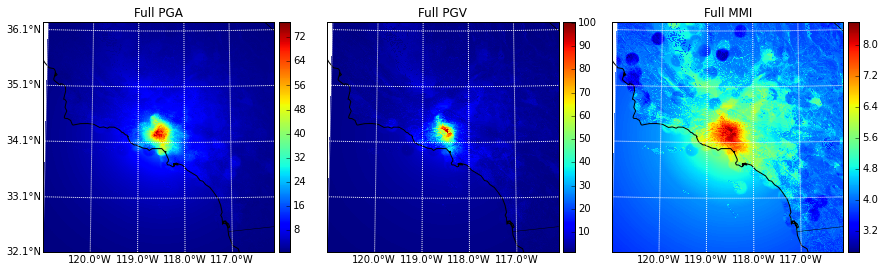

In [6]:
shakegrid = shake.ShakeGrid.load(shakefile)
pgagrid = shakegrid.getLayer('pga')
pgvgrid = shakegrid.getLayer('pgv')
mmigrid = shakegrid.getLayer('mmi')
fig,(ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map2DGrid(ax0,pgagrid,'Full PGA',isLeft=True)
map2DGrid(ax1,pgvgrid,'Full PGV')
map2DGrid(ax2,mmigrid,'Full MMI')
print pgagrid.getGeoDict()

{'ymax': 35.24475, 'ncols': 302, 'xdim': 0.008333, 'nrows': 249, 'xmax': -117.296, 'xmin': -119.796, 'ymin': 33.17725, 'ydim': 0.008337}


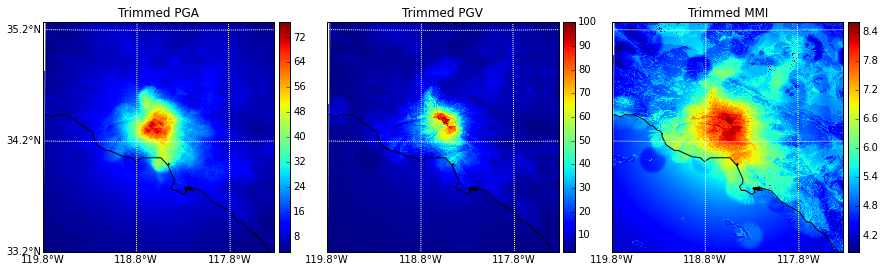

In [8]:
geodict = shake.getShakeDict(shakefile)
#bring in the shakemap by a half dimension (quarter on each side)
lonrange = geodict['xmax'] - geodict['xmin']
latrange = geodict['ymax'] - geodict['ymin']
newxmin = geodict['xmin'] + lonrange/4.0
newxmax = geodict['xmax'] - lonrange/4.0
newymin = geodict['ymin'] + latrange/4.0
newymax = geodict['ymax'] - latrange/4.0
newbounds = (newxmin,newxmax,newymin,newymax)
shakegrid = shake.ShakeGrid.load(shakefile,bounds=newbounds)
#shakegrid(newbounds,resample=True)
pgagrid = shakegrid.getLayer('pga')
pgvgrid = shakegrid.getLayer('pgv')
mmigrid = shakegrid.getLayer('mmi')
fig,(ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map2DGrid(ax0,pgagrid,'Trimmed PGA',isLeft=True)
map2DGrid(ax1,pgvgrid,'Trimmed PGV')
map2DGrid(ax2,mmigrid,'Trimmed MMI')
print pgagrid.getGeoDict()

In [9]:
newbounds

(-119.796, -117.296, 33.17725, 35.24475)

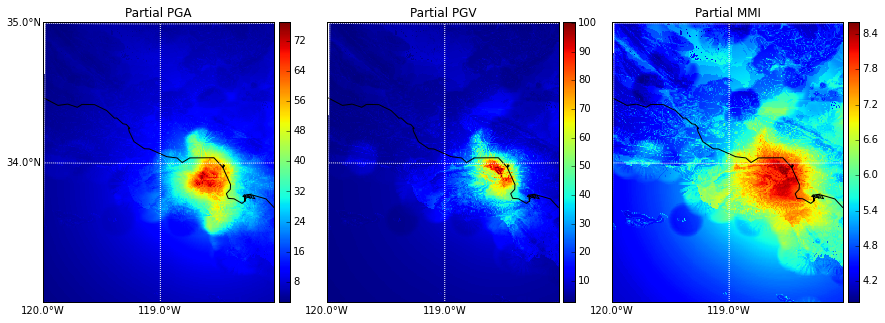

In [7]:
bounds = (-120.0,-118.0,33.0,35.0)
shakegrid = shake.ShakeGrid.load(shakefile,bounds=bounds)
pgagrid = shakegrid.getLayer('pga')
pgvgrid = shakegrid.getLayer('pgv')
mmigrid = shakegrid.getLayer('mmi')
fig,(ax0,ax1,ax2) = plt.subplots(nrows=1,ncols=3,figsize=(12,6))
fig.tight_layout()
map2DGrid(ax0,pgagrid,'Partial PGA',isLeft=True)
map2DGrid(ax1,pgvgrid,'Partial PGV')
map2DGrid(ax2,mmigrid,'Partial MMI')

In [10]:
print pgagrid.getGeoDict()

{'ymax': 35.002939, 'ncols': 239, 'xdim': 0.008333, 'nrows': 241, 'xmax': -118.00445500000001, 'xmin': -119.996042, 'ymin': 32.993722, 'ydim': 0.008337}
